In [ ]:
#pip install textblob

import pkg_resources
print(pkg_resources.get_distribution("textblob").version)

In [1]:
pip show textblob

Name: textblob
Version: 0.19.0
Summary: Simple, Pythonic text processing. Sentiment analysis, part-of-speech tagging, noun phrase parsing, and more.
Home-page: 
Author: 
Author-email: Steven Loria <sloria1@gmail.com>
License: 
Location: C:\Users\Onaivwe Gift\AppData\Roaming\Python\Python312\site-packages
Requires: nltk
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Download NLTK resources (first run only)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Onaivwe
[nltk_data]     Gift\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Onaivwe
[nltk_data]     Gift\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Onaivwe
[nltk_data]     Gift\AppData\Roaming\nltk_data...


True

In [3]:
# ------------------------
# Load Dataset
# ------------------------
df = pd.read_csv("./excel_work-data/amazon_reviews.csv")
df['reviewText'] = df['reviewText'].astype(str).fillna('')

In [4]:
# ------------------------
# Text Preprocessing
# ------------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.lower().split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['reviewText'].apply(preprocess_text)

In [5]:
# ------------------------
# Sentiment with TextBlob
# ------------------------
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

def categorize_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['polarity'].apply(categorize_sentiment)

In [7]:
# ------------------------
# Train-Test Split & Evaluation
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42
)

In [8]:
predictions = [categorize_sentiment(TextBlob(text).sentiment.polarity) for text in X_test]
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        12
     neutral       1.00      1.00      1.00         6
    positive       1.00      1.00      1.00       182

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



C:\Users\Onaivwe Gift\AppData\Local\Temp\ipykernel_26044\2794229677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")


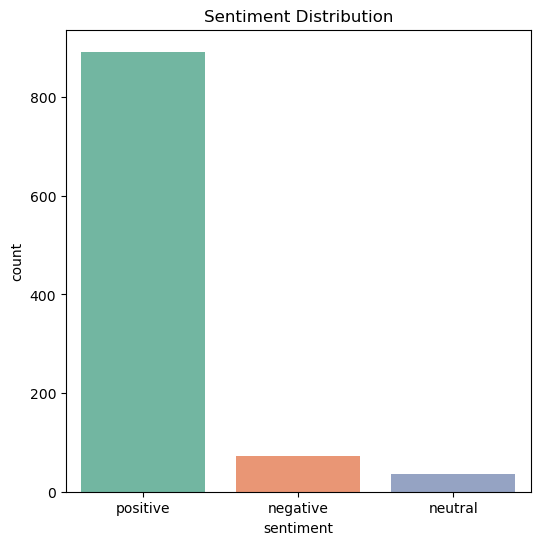

In [9]:
# ------------------------
# Visualization
# ------------------------
plt.figure(figsize=(6, 6))
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

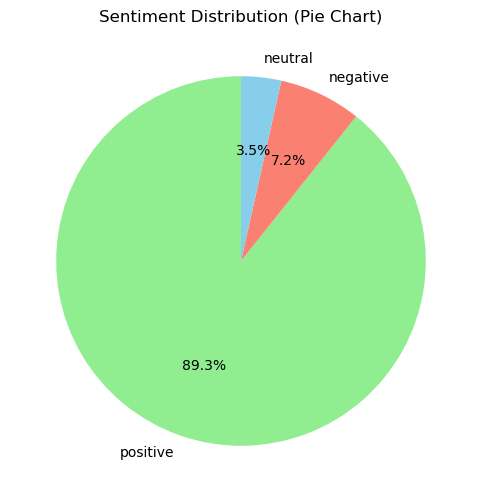

In [10]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90, colors=["lightgreen","salmon","skyblue"])
plt.title("Sentiment Distribution (Pie Chart)")
plt.ylabel("")
plt.show()